In [1]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680546 sha256=d8723ffe7109fd5e9a2eb5b047562547867d080ca03010463f476820fa0f6f22
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-hcd3bot4/kobert-tokenizer_2c2d4f87d8fb4300bebd3825c9295a6c
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-hcd3bot4/kobert-tokenizer_2c2d4f87d8fb4300bebd3825c9295a6c
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=4f8940ee3b1ab740334e9d47d8c365868c745c9ab9eff5406b3ce24894fae422
  Stored in directory: /tmp/pip-ephem-wheel-cache-zpoe92nc/wheels/64/c4/82/d70d864682468fad0bf8269b0dfd88daf48f209be4c8ade164
Successfully built kobert_tokenizer


In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-43ebthvs
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-43ebthvs
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from kobert_tokenizer import KoBERTTokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_pytorch_kobert_model()

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [5]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
# data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data_path = '/content/drive/MyDrive/미니프로젝트_4차/dataset/train.csv'
data = pd.read_csv(data_path)

In [9]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

data = data.replace(label_dict)
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [10]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [11]:
# Setting parameters
max_len = 200
batch_size = 64
warmup_ratio = 0.1
num_epochs = 1000
max_grad_norm = 1
log_interval = 10
learning_rate =  5e-5

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, 
    random_state=2023, stratify=data['label'])

In [13]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, 
    random_state=2023, stratify=y_train)

In [14]:
dataset_train = []
for sen, label in zip(x_train, y_train):
    dataset_train.append((sen, str(label)))
dataset_val = []
for sen, label in zip(x_val, y_val):
    dataset_val.append((sen, str(label)))
dataset_test = []
for sen, label in zip(x_test, y_test):
    dataset_test.append((sen, str(label)))

In [15]:
tk = tokenizer.tokenize
data_train = BERTDataset(dataset_train, 0, 1, tk, vocab, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tk, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tk, vocab, max_len, True, False)

In [16]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [17]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 layer_norm=None, # 마지막 layer norm
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        self.layer_norm = layer_norm
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
        if layer_norm:
            self.layer_norm = nn.LayerNorm(hidden_size)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.layer_norm:
            pooler = self.layer_norm(pooler)
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [18]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.3, layer_norm=True).to(device)

# 전체 Freeze
for param in model.parameters():
    param.requires_grad = False

trainable = False
for name, param in model.named_parameters():
    if name == 'bert.encoder.layer.10.attention.self.query.weight': # 10번 째 블록부터 trainable
        trainable = True
    param.requires_grad = True

# for name, param in model.named_parameters():
#     if name.split('.')[-2] == 'LayerNorm': # LayerNorm 은 모두 학습 시키기
#         param.requires_grad = True
    
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [19]:
# Early Stopping
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
best_acc = 0
patience_limit = 10 # 몇 번의 epoch까지 지켜볼지를 결정
patience_check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

train_history=[]
val_history=[]
train_loss_history=[]
val_loss_history=[]
for e in range(num_epochs):
    train_acc, train_loss = 0.0, 0.0
    val_acc, val_loss = 0.0, 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        train_loss += loss.data.cpu().numpy()
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            # train_history.append(train_acc / (batch_id+1))
            # train_loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    print("epoch {} train loss {}".format(e+1, train_loss / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))
    train_loss_history.append(train_loss / (batch_id+1))
    
    model.eval()
    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            val_acc += calc_accuracy(out, label)
            val_loss += loss_fn(out, label).data.cpu().numpy()
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    print("epoch {} val loss {}".format(e+1, val_loss / (batch_id+1)))
    val_history.append(val_acc / (batch_id+1))
    val_loss_history.append(val_loss / (batch_id+1))

    # ### early stopping 여부를 체크하는 부분 ###
    # if val_acc < best_acc: # acc 개선되지 않은 경우
    #     patience_check += 1
    #     if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
    #         break
    # else: # acc가 개선된 경우
    #     best_acc = val_acc
    #     patience_check = 0

    ### early stopping 여부를 체크하는 부분 ###
    if val_loss > best_loss: # loss가 개선되지 않은 경우
        patience_check += 1
        if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
            break
    else: # loss가 개선된 경우
        best_loss = val_loss
        patience_check = 0

  0%|          | 0/42 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.8208038806915283 train acc 0.171875
epoch 1 batch id 11 loss 1.6697496175765991 train acc 0.18323863636363635
epoch 1 batch id 21 loss 1.7578336000442505 train acc 0.1875
epoch 1 batch id 31 loss 1.7213802337646484 train acc 0.1844758064516129
epoch 1 batch id 41 loss 1.7290120124816895 train acc 0.18826219512195122
epoch 1 train acc 0.18931686046511628
epoch 1 train loss 1.8048120793842135


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 val acc 0.17926829268292682
epoch 1 val loss 1.7576262712478639


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.7455739974975586 train acc 0.1875
epoch 2 batch id 11 loss 1.7225730419158936 train acc 0.17613636363636365
epoch 2 batch id 21 loss 1.5842498540878296 train acc 0.19122023809523808
epoch 2 batch id 31 loss 1.740346074104309 train acc 0.1975806451612903
epoch 2 batch id 41 loss 1.6302216053009033 train acc 0.21150914634146342
epoch 2 train acc 0.213671442414175
epoch 2 train loss 1.7104416432834806


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 val acc 0.2060213414634146
epoch 2 val loss 1.61569664478302


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.623702049255371 train acc 0.25
epoch 3 batch id 11 loss 1.470389485359192 train acc 0.26704545454545453
epoch 3 batch id 21 loss 1.483855962753296 train acc 0.27901785714285715
epoch 3 batch id 31 loss 1.6292426586151123 train acc 0.30544354838709675
epoch 3 batch id 41 loss 1.527564287185669 train acc 0.33041158536585363
epoch 3 train acc 0.334172549833887
epoch 3 train loss 1.526505742754255


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 val acc 0.3780487804878049
epoch 3 val loss 1.4413615465164185


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 1.443518042564392 train acc 0.34375
epoch 4 batch id 11 loss 1.3423064947128296 train acc 0.3536931818181818
epoch 4 batch id 21 loss 1.4897552728652954 train acc 0.3638392857142857
epoch 4 batch id 31 loss 1.5575430393218994 train acc 0.38810483870967744
epoch 4 batch id 41 loss 1.3465780019760132 train acc 0.39939024390243905
epoch 4 train acc 0.4004014396456257
epoch 4 train loss 1.3878327068828402


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 val acc 0.4475609756097561
epoch 4 val loss 1.3193969011306763


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 1.3287121057510376 train acc 0.359375
epoch 5 batch id 11 loss 1.2437145709991455 train acc 0.4005681818181818
epoch 5 batch id 21 loss 1.3366559743881226 train acc 0.4181547619047619
epoch 5 batch id 31 loss 1.507323145866394 train acc 0.4415322580645161
epoch 5 batch id 41 loss 1.2253539562225342 train acc 0.4561737804878049
epoch 5 train acc 0.4591552464008859
epoch 5 train loss 1.2683533231417339


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 val acc 0.47957317073170735
epoch 5 val loss 1.2035703182220459


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 1.1197372674942017 train acc 0.5625
epoch 6 batch id 11 loss 1.2174396514892578 train acc 0.46875
epoch 6 batch id 21 loss 1.2517149448394775 train acc 0.4799107142857143
epoch 6 batch id 31 loss 1.3635575771331787 train acc 0.4939516129032258
epoch 6 batch id 41 loss 1.0836067199707031 train acc 0.5038109756097561
epoch 6 train acc 0.506765642303433
epoch 6 train loss 1.1459916844254447


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 val acc 0.5910823170731707
epoch 6 val loss 1.0619635701179504


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 1.020402431488037 train acc 0.609375
epoch 7 batch id 11 loss 1.052837610244751 train acc 0.5525568181818182
epoch 7 batch id 21 loss 0.9976261854171753 train acc 0.5654761904761905
epoch 7 batch id 31 loss 1.1269750595092773 train acc 0.5826612903225806
epoch 7 batch id 41 loss 0.9591091275215149 train acc 0.5929878048780488
epoch 7 train acc 0.5960340531561462
epoch 7 train loss 1.0016576945781708


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 val acc 0.6623475609756098
epoch 7 val loss 0.9251729369163513


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.7989328503608704 train acc 0.703125
epoch 8 batch id 11 loss 0.9248102903366089 train acc 0.6193181818181818
epoch 8 batch id 21 loss 0.8019628524780273 train acc 0.6383928571428571
epoch 8 batch id 31 loss 1.0022886991500854 train acc 0.6481854838709677
epoch 8 batch id 41 loss 0.7123597860336304 train acc 0.6577743902439024
epoch 8 train acc 0.6603855204872646
epoch 8 train loss 0.8755758830479213


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 val acc 0.6859756097560975
epoch 8 val loss 0.8267890453338623


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.6785247921943665 train acc 0.75
epoch 9 batch id 11 loss 0.8571227788925171 train acc 0.6775568181818182
epoch 9 batch id 21 loss 0.7108347415924072 train acc 0.6986607142857143
epoch 9 batch id 31 loss 0.9822028875350952 train acc 0.7071572580645161
epoch 9 batch id 41 loss 0.6442528963088989 train acc 0.7141768292682927
epoch 9 train acc 0.7171061738648948
epoch 9 train loss 0.7688132652214595


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 val acc 0.7297256097560976
epoch 9 val loss 0.7469383358955384


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.6460380554199219 train acc 0.75
epoch 10 batch id 11 loss 0.7628965973854065 train acc 0.703125
epoch 10 batch id 21 loss 0.5250251293182373 train acc 0.7254464285714286
epoch 10 batch id 31 loss 0.9018256664276123 train acc 0.7363911290322581
epoch 10 batch id 41 loss 0.4665123522281647 train acc 0.7492378048780488
epoch 10 train acc 0.7496712347729789
epoch 10 train loss 0.6648940607195809


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 val acc 0.750609756097561
epoch 10 val loss 0.6921692311763763


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.5268747806549072 train acc 0.78125
epoch 11 batch id 11 loss 0.6768731474876404 train acc 0.7514204545454546
epoch 11 batch id 21 loss 0.5172451138496399 train acc 0.7708333333333334
epoch 11 batch id 31 loss 0.718604326248169 train acc 0.780241935483871
epoch 11 batch id 41 loss 0.421256959438324 train acc 0.7877286585365854
epoch 11 train acc 0.7900141888150609
epoch 11 train loss 0.5790840614409674


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 11 val acc 0.7773628048780488
epoch 11 val loss 0.6395631432533264


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.49523842334747314 train acc 0.859375
epoch 12 batch id 11 loss 0.512295126914978 train acc 0.7840909090909091
epoch 12 batch id 21 loss 0.32312527298927307 train acc 0.8117559523809523
epoch 12 batch id 31 loss 0.7002535462379456 train acc 0.8180443548387096
epoch 12 batch id 41 loss 0.2923195958137512 train acc 0.8288871951219512
epoch 12 train acc 0.8318538898117387
epoch 12 train loss 0.48279514766874765


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 12 val acc 0.775609756097561
epoch 12 val loss 0.6123028337955475


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.35930725932121277 train acc 0.890625
epoch 13 batch id 11 loss 0.4948127269744873 train acc 0.8181818181818182
epoch 13 batch id 21 loss 0.2994454503059387 train acc 0.8467261904761905
epoch 13 batch id 31 loss 0.5708308815956116 train acc 0.8492943548387096
epoch 13 batch id 41 loss 0.21776188910007477 train acc 0.8555640243902439
epoch 13 train acc 0.8567881367663345
epoch 13 train loss 0.42288353471528917


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 13 val acc 0.7902439024390244
epoch 13 val loss 0.5769910871982574


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.410091757774353 train acc 0.890625
epoch 14 batch id 11 loss 0.358573853969574 train acc 0.8380681818181818
epoch 14 batch id 21 loss 0.2710842490196228 train acc 0.8645833333333334
epoch 14 batch id 31 loss 0.43885669112205505 train acc 0.8694556451612904
epoch 14 batch id 41 loss 0.1763020008802414 train acc 0.8776676829268293
epoch 14 train acc 0.8794729374307864
epoch 14 train loss 0.3654172161505336


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 14 val acc 0.7898628048780487
epoch 14 val loss 0.5896628439426422


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.3510875999927521 train acc 0.90625
epoch 15 batch id 11 loss 0.37234243750572205 train acc 0.8551136363636364
epoch 15 batch id 21 loss 0.19565649330615997 train acc 0.8809523809523809
epoch 15 batch id 31 loss 0.32834097743034363 train acc 0.8855846774193549
epoch 15 batch id 41 loss 0.09205406159162521 train acc 0.8925304878048781
epoch 15 train acc 0.8945355758582503
epoch 15 train loss 0.3149894073250748


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 15 val acc 0.8023628048780488
epoch 15 val loss 0.5956429779529572


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.33482152223587036 train acc 0.859375
epoch 16 batch id 11 loss 0.31778544187545776 train acc 0.8821022727272727
epoch 16 batch id 21 loss 0.13024455308914185 train acc 0.8988095238095238
epoch 16 batch id 31 loss 0.23324529826641083 train acc 0.9022177419354839
epoch 16 batch id 41 loss 0.05455569550395012 train acc 0.9115853658536586
epoch 16 train acc 0.9136904761904762
epoch 16 train loss 0.25438770252679077


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 16 val acc 0.8103658536585365
epoch 16 val loss 0.6079975128173828


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.19491808116436005 train acc 0.90625
epoch 17 batch id 11 loss 0.27129828929901123 train acc 0.8991477272727273
epoch 17 batch id 21 loss 0.06518933176994324 train acc 0.9233630952380952
epoch 17 batch id 31 loss 0.2789992392063141 train acc 0.9274193548387096
epoch 17 batch id 41 loss 0.03465377911925316 train acc 0.9329268292682927
epoch 17 train acc 0.933970099667774
epoch 17 train loss 0.20139807852960767


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 17 val acc 0.7961128048780488
epoch 17 val loss 0.6810191035270691


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.31317198276519775 train acc 0.890625
epoch 18 batch id 11 loss 0.41633355617523193 train acc 0.9019886363636364
epoch 18 batch id 21 loss 0.14240722358226776 train acc 0.9084821428571429
epoch 18 batch id 31 loss 0.17454232275485992 train acc 0.9193548387096774
epoch 18 batch id 41 loss 0.03664049133658409 train acc 0.926829268292683
epoch 18 train acc 0.9274640088593578
epoch 18 train loss 0.21508087208938031


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 18 val acc 0.7929878048780488
epoch 18 val loss 0.7126221060752869


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.18975895643234253 train acc 0.90625
epoch 19 batch id 11 loss 0.1559024304151535 train acc 0.9275568181818182
epoch 19 batch id 21 loss 0.12823264300823212 train acc 0.9322916666666666
epoch 19 batch id 31 loss 0.17977599799633026 train acc 0.9319556451612904
epoch 19 batch id 41 loss 0.029856914654374123 train acc 0.9420731707317073
epoch 19 train acc 0.9423449612403102
epoch 19 train loss 0.1717090243473649


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 19 val acc 0.8023628048780488
epoch 19 val loss 0.7364120721817017


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.22588881850242615 train acc 0.90625
epoch 20 batch id 11 loss 0.17851513624191284 train acc 0.9318181818181818
epoch 20 batch id 21 loss 0.06513634324073792 train acc 0.9501488095238095
epoch 20 batch id 31 loss 0.16877979040145874 train acc 0.952116935483871
epoch 20 batch id 41 loss 0.018192633986473083 train acc 0.9592225609756098
epoch 20 train acc 0.9601934523809523
epoch 20 train loss 0.12251517220976807


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 20 val acc 0.7957317073170731
epoch 20 val loss 0.7809437692165375


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.09521610289812088 train acc 0.984375
epoch 21 batch id 11 loss 0.13023321330547333 train acc 0.9588068181818182
epoch 21 batch id 21 loss 0.03927140682935715 train acc 0.9672619047619048
epoch 21 batch id 31 loss 0.18318751454353333 train acc 0.9621975806451613
epoch 21 batch id 41 loss 0.009876842610538006 train acc 0.9649390243902439
epoch 21 train acc 0.9657738095238095
epoch 21 train loss 0.11185466655574385


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 21 val acc 0.803734756097561
epoch 21 val loss 0.8126882553100586


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.05829940363764763 train acc 1.0
epoch 22 batch id 11 loss 0.17986436188220978 train acc 0.9673295454545454
epoch 22 batch id 21 loss 0.04769735038280487 train acc 0.9769345238095238
epoch 22 batch id 31 loss 0.2083021104335785 train acc 0.9652217741935484
epoch 22 batch id 41 loss 0.11450657248497009 train acc 0.9622713414634146
epoch 22 train acc 0.9631696428571429
epoch 22 train loss 0.1097836270484896


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 22 val acc 0.8162347560975609
epoch 22 val loss 0.8492257535457611


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 23 batch id 1 loss 0.18729127943515778 train acc 0.9375
epoch 23 batch id 11 loss 0.08833249658346176 train acc 0.9602272727272727
epoch 23 batch id 21 loss 0.014511710032820702 train acc 0.9724702380952381
epoch 23 batch id 31 loss 0.11246819794178009 train acc 0.9753024193548387
epoch 23 batch id 41 loss 0.007887194864451885 train acc 0.977515243902439
epoch 23 train acc 0.9780505952380952
epoch 23 train loss 0.07056291226208919


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 23 val acc 0.8148628048780487
epoch 23 val loss 0.9743753790855407


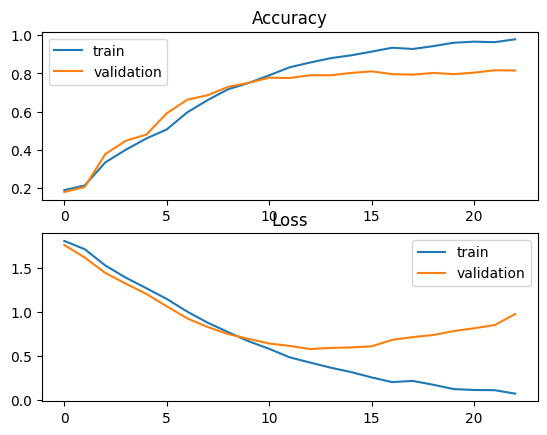

In [20]:
plt.subplot(2, 1, 1)
plt.title('Accuracy')
plt.plot(train_history, label='train')
plt.plot(val_history, label='validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(train_loss_history, label='train')
plt.plot(val_loss_history, label='validation')
plt.legend()
plt.show()

In [21]:
model.eval()
test_acc = 0.0
y_pred = []
y_test = []
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
        y_test = np.hstack((y_test, label.cpu().numpy()))
        y_pred = np.hstack((y_pred, torch.max(out, 1)[1].cpu().numpy()))
print("test acc {}".format(test_acc / (batch_id+1)))

  0%|          | 0/12 [00:00<?, ?it/s]

test acc 0.8010553728070176


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[258  31  12  15   1]
 [  8 134   1   3   1]
 [ 33  17  86  10   0]
 [  6   6   3  97   0]
 [  0   1   0   0  19]]
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       317
         1.0       0.71      0.91      0.80       147
         2.0       0.84      0.59      0.69       146
         3.0       0.78      0.87      0.82       112
         4.0       0.90      0.95      0.93        20

    accuracy                           0.80       742
   macro avg       0.82      0.83      0.81       742
weighted avg       0.81      0.80      0.80       742

0.8132288194843037


In [23]:
reverse_label = {}
for k, v in label_dict.items():
    reverse_label[v] = k

In [24]:
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tk, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        logits=out[0]
        logits = logits.detach().cpu().numpy()
        pred = np.argmax(logits)
        print(f'>> 분류 결과 : {reverse_label[pred]}')

In [25]:
predict("tokenization은 어떤 역할을 하나요?")

>> 분류 결과 : 이론


In [26]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [27]:
predict('for i in range(10)')

>> 분류 결과 : 코드2


In [28]:
predict('<a href="www.google.com"> Google </a>')

>> 분류 결과 : 웹


In [29]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [30]:
predict("엔 그램 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 코드2


In [ ]:
predict("N-Gram 을 구현하는 방법이 뭔가요?")

In [32]:
predict('N-Gram의 개념이 뭔가요?')

>> 분류 결과 : 이론


In [33]:
predict("출석 요청드립니다.")

>> 분류 결과 : 시스템 운영


In [34]:
predict("원격 가능할까요,,,,,????")

>> 분류 결과 : 원격


In [35]:
# save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/save_model/'
save_path = '/content/drive/MyDrive/미니프로젝트_4차/save_model/'
torch.save(model, save_path + 'v8_kobert.pt')